In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

In [24]:
df_cash_request = pd.read_csv("./project_dataset/extract - cash request - data analyst.csv")
df_fees = pd.read_csv("./project_dataset/extract - fees - data analyst - .csv")



In [25]:
print(df_cash_request.head())

     id  amount    status                     created_at  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                      updated_at  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  2019-12-11 16:47:42.405646+00   
1  2019-12-11 14:24:22.900054+00    231.0  2019-12-11 14:24:22.897988+00   
2  2019-12-11 09:46:59.779773+00    191.0  2019-12-11 09:46:59.777728+00   
3  2019-12-18 14:26:18.136163+00    761.0  2019-12-18 14:26:18.128407+00   
4   2020-05-07 09:21:55.34008+00   7686.0  2020-05-07 09:21:55.320193+00   

   deleted_account_id             reimbursement_date  \
0                 NaN  2020-01-09 19:05:21.596363+00   
1                 NaN   2020-01-09 19:50:12.34778+00   
2             

In [26]:
print(df_fees.shape)
print(df_cash_request.shape)

(21061, 13)
(23970, 16)


In [27]:
df_cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [28]:
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [29]:
df_cash_request.describe()

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


In [30]:
df_fees.describe()

,id,cash_request_id,total_amount
count,21061.000000,21057.000000,21061.000000
mean,10645.355111,16318.449162,5.000237
std,6099.315256,6656.149949,0.034453
min,1.000000,1456.000000,5.000000
25%,5385.000000,11745.000000,5.000000
50%,10652.000000,17160.000000,5.000000
75%,15925.000000,21796.000000,5.000000
max,21193.000000,27010.000000,10.000000


In [31]:
fees_headers = df_fees.columns.tolist()
fees_headers

cash_request_headers = df_cash_request.columns.tolist()
cash_request_headers

['id',
 'amount',
 'status',
 'created_at',
 'updated_at',
 'user_id',
 'moderated_at',
 'deleted_account_id',
 'reimbursement_date',
 'cash_request_received_date',
 'money_back_date',
 'transfer_type',
 'send_at',
 'recovery_status',
 'reco_creation',
 'reco_last_update']

In [32]:
# df_cash_request['user_id'] = df_cash_request['user_id'].fillna(df_cash_request['deleted_account_id'])




In [33]:

# df_cash_request['user_id'] = df_cash_request['user_id'].fillna(df_cash_request['deleted_account_id'])
# unique_user_ids_cash = df_cash_request['user_id'].unique()



In [61]:
dates_cash = pd.to_datetime(df_cash_request['created_at'])
df_cash_request['Clean_date'] = dates_cash.dt.strftime('%Y-%m-%d')
df_cash_request['Clean_date'] = pd.to_datetime(df_cash_request['Clean_date'])
df_cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          23970 non-null  int64         
 1   amount                      23970 non-null  float64       
 2   status                      23970 non-null  object        
 3   created_at                  23970 non-null  object        
 4   updated_at                  23970 non-null  object        
 5   user_id                     23970 non-null  float64       
 6   moderated_at                16035 non-null  object        
 7   deleted_account_id          2104 non-null   float64       
 8   reimbursement_date          23970 non-null  object        
 9   cash_request_received_date  16289 non-null  object        
 10  money_back_date             16543 non-null  object        
 11  transfer_type               23970 non-null  object    

In [50]:
# Time_delta = df_cash_request['Clean_date'].max() - df_cash_request['Clean_date'].min()
# Time_delta = Time_delta.days
# Time_delta

# print(type(Timedelta))

348

In [43]:
# num_of_use = df_cash_request['id'].count()
# num_of_use

np.int64(23970)

In [85]:
df_cash_request['cohort'] = df_cash_request['Clean_date'].dt.to_period('M')

In [66]:
# df_cash_request[["user_id", "cohort"]].groupby("user_id").min()

,cohort
user_id,
34.0,2020-04
35.0,2019-12
47.0,2019-11
52.0,2019-12
53.0,2019-12
...,...
103425.0,2020-11
103437.0,2020-11
103496.0,2020-11


In [81]:
# frq_uso_mes = df_cash_request.groupby('cohort')['user_id'].count().reset_index()
# frq_uso_mes


,cohort,user_id
0,2019-11,1
1,2019-12,289
2,2020-01,223
3,2020-02,184
4,2020-03,244
5,2020-04,473
6,2020-05,837
7,2020-06,2615
8,2020-07,3601
9,2020-08,3417


In [115]:
first_purchase = df_cash_request.groupby('user_id')['cohort'].min().reset_index()
first_purchase
user_per_month = first_purchase.groupby('cohort')['user_id'].nunique().reset_index()
user_per_month

,cohort,user_id
0,2019-11,1
1,2019-12,254
2,2020-01,106
3,2020-02,90
4,2020-03,86
5,2020-04,246
6,2020-05,432
7,2020-06,1540
8,2020-07,1482
9,2020-08,728


C:\Users\Khaled\AppData\Local\Temp\ipykernel_10800\1615881804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='user_id', x='cohort', data=user_per_month, palette='viridis')


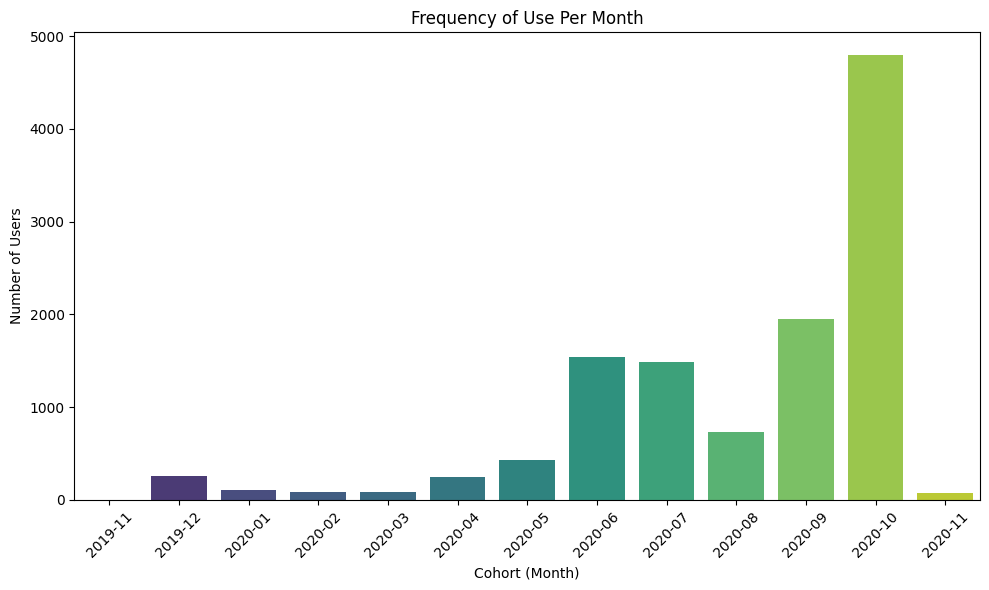

In [116]:
plt.figure(figsize=(10, 6))
sns.barplot(y='user_id', x='cohort', data=user_per_month, palette='viridis')
plt.xlabel('Cohort (Month)')
plt.ylabel('Number of Users')
plt.title('Frequency of Use Per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y='user_id', x='cohort', data=user_per_month, palette='viridis')
plt.xlabel('Cohort (Month)')
plt.ylabel('Number of Users')
plt.title('Frequency of Use Per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
